In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

data = pd.read_csv ('/content/winequality-white.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality num,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Bad
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Bad
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Bad
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Good


In [ ]:
classLabel="quality num"
data2 = data.drop(classLabel, axis = 1)

In [ ]:
ClassLabel="quality"
dataFeatures = data2.drop(ClassLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r-1]

In [ ]:
Features = data2.drop(ClassLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


In [ ]:
dataPhenotypes = data[ClassLabel].values
dataPhenotypes= dataPhenotypes[:r-1]

In [ ]:
dataPhenotypes

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Good'], dtype=object)

In [ ]:
dataFeatures_train, dataFeatures_test, dataPhenotypes_train, dataPhenotypes_test = train_test_split(dataFeatures, dataPhenotypes, stratify=dataPhenotypes, random_state=1)

In [ ]:
DataPhenotypes_train=LabelBinarizer().fit_transform(dataPhenotypes_train)
DataPhenotypes_test=LabelBinarizer().fit_transform(dataPhenotypes_test)  

In [ ]:
pip install scikit-eLCS

     |████████████████████████████████| 258 kB 5.0 MB/s 
  Created wheel for scikit-eLCS: filename=scikit_eLCS-1.2.3-py3-none-any.whl size=38594 sha256=e1dea2366923e95c4b501c856e170d44756511499fbeff0300dd8c9044d9366e
  Stored in directory: /root/.cache/pip/wheels/97/97/69/dcb4cf87c2671813c166955429f3fdfff9ece959980c328bfb
Successfully built scikit-eLCS


In [ ]:
l=len(DataPhenotypes_train)
Y=DataPhenotypes_train.reshape(l,)

In [ ]:
from skeLCS import eLCS
model = eLCS(N=10000, learning_iterations = 10000,nu = 10,selection_method='tournament',track_accuracy_while_fit=True)
trainedModel = model.fit(dataFeatures_train,Y)

In [ ]:
trainedModel.export_iteration_tracking_data("iterationData_white_wine_quality_LCS.csv")

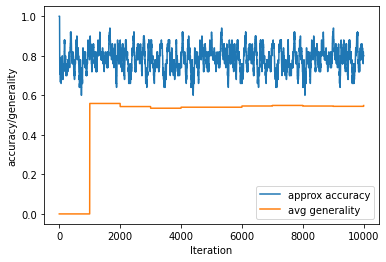

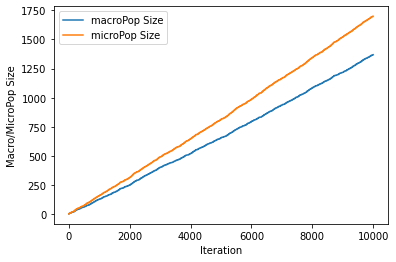

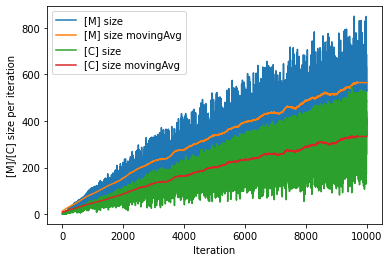

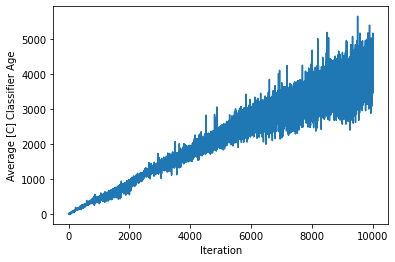

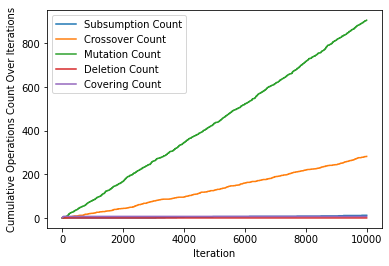

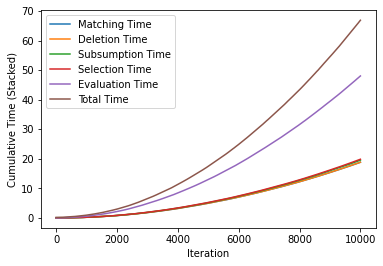

In [ ]:
import matplotlib.pyplot as plt

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_white_wine_quality_LCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
cSize = dataTracking["Correct Set Size"].values
experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,cSize,label="[C] size")
plt.plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[C] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [C] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="Selection Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [ ]:
trainedModel.export_final_rule_population(Features,ClassLabel,filename="RulePopulationWineQualityWhite.csv",DCAL=False)

populationData2 = pd.read_csv("RulePopulationWineQualityWhite.csv")
display(populationData2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,#,#,"-0.35929999999999995,0.8192999999999999",#,#,"-33.39,175.39","75.28999999999999,332.71000000000004","0.9827886,1.0056114",#,#,...,1.682863e-01,0.836768,4,679.953577,9996,0,0.454545,NaN,6741,8056
1,#,#,"-0.07819999999999999,0.8182","-2.3000000000000007,14.0",#,"-58.8,112.8","-23.05000000000001,209.05",#,#,#,...,4.391533e-04,0.461596,6,771.964731,9982,5,0.454545,NaN,1244,2695
2,#,"0.0012999999999999956,0.37870000000000004","0.05100000000000002,0.5489999999999999",#,"-0.06663499999999997,0.17263499999999998",#,"144.6,313.4","0.98537315,1.01182685","2.90565,3.37435","0.22224999999999995,0.75775",...,4.289577e-11,0.091884,1,776.015693,9968,10,0.727273,NaN,197,2144
3,"4.644,10.156","-0.1366,0.5366",#,#,#,#,#,"0.9849069,0.9983931",#,"0.29075,0.80925",...,1.858700e-02,0.671307,1,699.529315,9961,13,0.454545,NaN,3617,5388
4,#,"0.09459999999999996,0.6454","-0.20629999999999998,0.8063","-7.166000000000001,19.566000000000003",#,"-42.519999999999996,140.51999999999998",#,"0.98320755,0.99721245",#,#,...,3.595777e-05,0.359401,1,668.508347,9948,15,0.545455,NaN,216,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,"3.3920000000000003,9.008","-0.36847320547236995,0.6920999999999999",#,#,#,"29.5629026311901,112.8",#,#,#,"0.58725,1.0055",...,1.000000e+00,1.000000,1,1051.000000,9956,9956,0.454545,NaN,1,1
1364,#,#,"-0.7378332512460921,0.7002999999999999",#,"-0.09295,0.14295",#,#,#,"2.97755,3.64245",#,...,5.766504e-09,0.150000,1,683.506850,9982,9956,0.272727,NaN,6,40
1365,"3.3920000000000003,9.008",#,#,#,"-0.09295,0.14295",#,#,#,#,#,...,1.000000e+00,1.000000,1,1051.000000,9982,9982,0.272727,NaN,1,1
1366,#,#,"0.019699999999999995,0.7002999999999999","-17.998,29.598000000000003",#,#,"101.04,166.63","0.9748003,1.0069597","2.97755,3.64245",#,...,3.046441e-04,0.559758,1,711.008353,9982,9982,0.545455,NaN,0,0


In [ ]:
trainedModel.export_final_rule_population(Features,ClassLabel,filename="RulePopulationWineQualityWhite2.csv")

populationData3 = pd.read_csv("RulePopulationWineQualityWhite2.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,quality,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,"[-0.35929999999999995,0.8192999999999999], [-3...","citric acid, free sulfur dioxide, total sulfur...",0.0,1.682863e-01,0.836768,4,679.953577,9996,0,0.454545,NaN,6741,8056
1,"[-0.07819999999999999,0.8182], [-2.30000000000...","citric acid, residual sugar, free sulfur dioxi...",1.0,4.391533e-04,0.461596,6,771.964731,9982,5,0.454545,NaN,1244,2695
2,"[0.0012999999999999956,0.37870000000000004], [...","volatile acidity, citric acid, chlorides, tota...",1.0,4.289577e-11,0.091884,1,776.015693,9968,10,0.727273,NaN,197,2144
3,"[4.644,10.156], [-0.1366,0.5366], [0.9849069,0...","fixed acidity, volatile acidity, density, sulp...",0.0,1.858700e-02,0.671307,1,699.529315,9961,13,0.454545,NaN,3617,5388
4,"[0.09459999999999996,0.6454], [-0.206299999999...","volatile acidity, citric acid, residual sugar,...",0.0,3.595777e-05,0.359401,1,668.508347,9948,15,0.545455,NaN,216,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,"[3.3920000000000003,9.008], [-0.36847320547236...","fixed acidity, volatile acidity, free sulfur d...",1.0,1.000000e+00,1.000000,1,1051.000000,9956,9956,0.454545,NaN,1,1
1364,"[-0.7378332512460921,0.7002999999999999], [-0....","citric acid, chlorides, pH",1.0,5.766504e-09,0.150000,1,683.506850,9982,9956,0.272727,NaN,6,40
1365,"[3.3920000000000003,9.008], [-0.09295,0.14295]...","fixed acidity, chlorides, alcohol",1.0,1.000000e+00,1.000000,1,1051.000000,9982,9982,0.272727,NaN,1,1
1366,"[0.019699999999999995,0.7002999999999999], [-1...","citric acid, residual sugar, total sulfur diox...",1.0,3.046441e-04,0.559758,1,711.008353,9982,9982,0.545455,NaN,0,0


In [ ]:
l1=len(DataPhenotypes_test)
Y_test=DataPhenotypes_test.reshape(l1,)

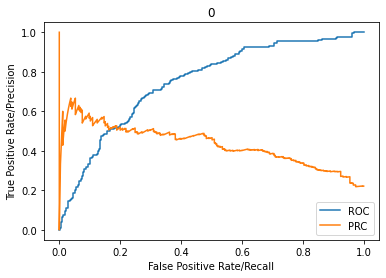

PRC AUC:0.4299700944696304
ROC AUC:0.7483844339622642


<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_test, probs[:,1])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test, probs[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()
plt.savefig("wine quality white LCS.png")

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [ ]:
probs

array([[9.99029622e-01, 9.70377986e-04],
       [9.99998743e-01, 1.25700167e-06],
       [9.88931466e-01, 1.10685337e-02],
       ...,
       [9.47265049e-01, 5.27349508e-02],
       [9.99927006e-01, 7.29939825e-05],
       [9.99998297e-01, 1.70262247e-06]])

In [ ]:
Y_test

array([0, 0, 0, ..., 0, 1, 0])